In [6]:
import pandas as pd
import numpy as np
import seaborn as sns 
import re
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

data_dir = "/Users/christian fink/Math485/Math485_2/"
sdg_names = pd.read_csv(data_dir + "sdg_name_definition.csv")

text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
text_df.drop(text_df.columns.values[0],axis = 1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)

Functions to find top 50 words, with and without stop_words and plot.

In [7]:
def analyze_word_frequencies(corpus, stop_words=None):
    text = ' '.join(corpus.str.lower())
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    
    if stop_words:
        words = [word for word in words if word not in stop_words]
    total_words = len(words)
    word_freq = Counter(words)
    top_50 = word_freq.most_common(50)
    freqs_50 = [freq for _, freq in top_50]
    
    cumulative_freqs = np.cumsum(freqs_50)
    coverage_percentage = (cumulative_freqs[-1] / total_words) * 100

    fig = plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot(121)
    ax1.plot(range(1, 51), cumulative_freqs, marker='o', color='blue', linewidth=2)
    ax1.set_xlabel('Number of Most Frequent Words')
    ax1.set_ylabel('Cumulative Word Count')
    ax1.set_title('Cumulative Frequency of Top 50 Words')
    ax1.grid(True)
    plt.tight_layout()
    
    word_details = [(word, freq, (freq/total_words)*100) 
                   for word, freq in top_50]
    
    return fig, coverage_percentage, word_details

def print_word_analysis(word_details, coverage_percentage):
    print("\nWord Frequency Analysis")
    print("{'Word'} {'Count'} {'Percentage'}")
    for word, freq, percentage in word_details[:50]:
        print(f"{word:<15} {freq:>10,d} {percentage:>11.2f}%")
    print(f"{coverage_percentage}% ")

Analysis of all SDGs with stop words:

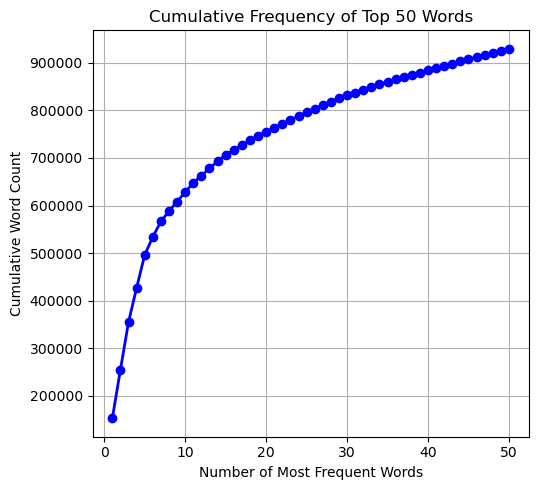


Word Frequency Analysis
{'Word'} {'Count'} {'Percentage'}
the                153,029        6.21%
of                 102,221        4.15%
and                100,212        4.07%
in                  71,795        2.91%
to                  69,124        2.81%
a                   37,813        1.53%
for                 32,275        1.31%
that                21,666        0.88%
as                  20,277        0.82%
on                  19,667        0.80%
are                 19,574        0.79%
by                  15,165        0.62%
with                15,092        0.61%
this                15,046        0.61%
be                  13,481        0.55%
from                10,483        0.43%
or                  10,081        0.41%
it                  10,047        0.41%
have                 9,789        0.40%
countries            8,498        0.34%
an                   8,398        0.34%
at                   8,172        0.33%
has                  8,118        0.33%
their                

In [8]:
fig, percentage, word_details = analyze_word_frequencies(text_df.text, stop_words='english')
plt.show()
print_word_analysis(word_details, percentage)

Analysis of all SDGs without stop words:

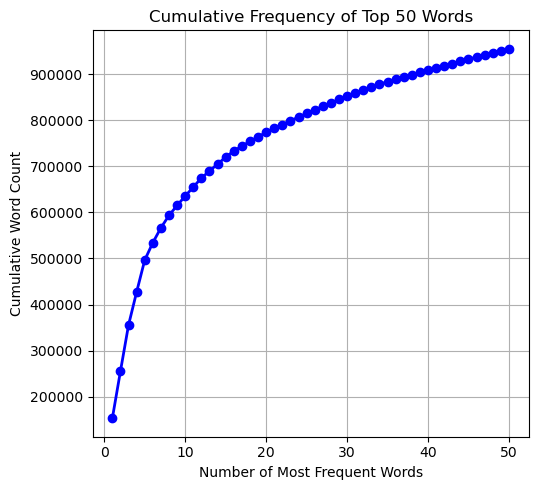


Word Frequency Analysis
{'Word'} {'Count'} {'Percentage'}
the                153,029        6.11%
of                 102,221        4.08%
and                100,212        4.00%
in                  71,795        2.87%
to                  69,124        2.76%
a                   37,813        1.51%
for                 32,275        1.29%
is                  26,972        1.08%
that                21,666        0.87%
as                  20,277        0.81%
on                  19,667        0.79%
are                 19,574        0.78%
by                  15,165        0.61%
with                15,092        0.60%
this                15,046        0.60%
be                  13,481        0.54%
from                10,483        0.42%
or                  10,081        0.40%
it                  10,047        0.40%
have                 9,789        0.39%
countries            8,498        0.34%
an                   8,398        0.34%
at                   8,172        0.33%
has                  

In [9]:
fig, percentage, word_details = analyze_word_frequencies(text_df.text)
plt.show()
print_word_analysis(word_details, percentage)

Analysis of SDG 8 documents only:

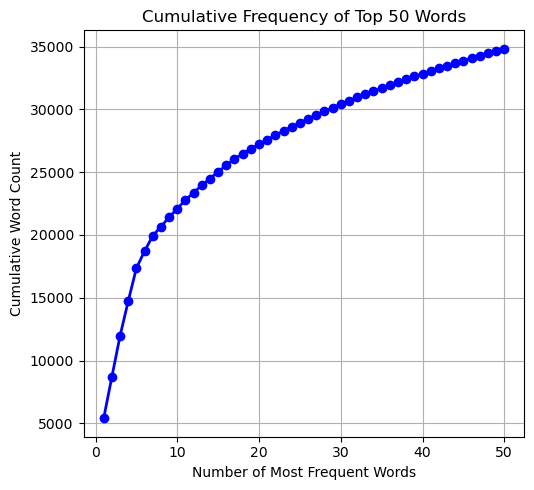


Word Frequency Analysis
{'Word'} {'Count'} {'Percentage'}
the                  5,400        6.15%
of                   3,294        3.75%
and                  3,261        3.71%
in                   2,777        3.16%
to                   2,618        2.98%
a                    1,366        1.56%
for                  1,212        1.38%
that                   745        0.85%
are                    734        0.84%
on                     694        0.79%
as                     683        0.78%
with                   601        0.68%
employment             566        0.64%
be                     550        0.63%
by                     539        0.61%
labour                 530        0.60%
this                   485        0.55%
workers                430        0.49%
or                     386        0.44%
work                   365        0.42%
have                   360        0.41%
from                   353        0.40%
more                   346        0.39%
also                 

In [10]:
sdg8_texts = text_df[text_df.sdg == 8].text
fig, percentage, word_details = analyze_word_frequencies(sdg8_texts, stop_words='english')
plt.show()
print_word_analysis(word_details, percentage)